# This notebook
1. Selects the patient, trial, variable
2. Load the corresponding DataFrame
3. Preprocessing options: Raw, Downsampled, Segmented, Normalized 


In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from Data_loader import base_folders  
from pipeline import segment_downsamp 
from segment_utils import segment_cycles
from downsample import downsample_df

In [2]:
# Trial parameters 
group_code = "G01"
patient_id = "S002"
day = "D01"
block = "B01"
trial = "T01"
signal_col = "Ankle Dorsiflexion RT (deg)"
min_length = 20
downsample_factor = 4

show_raw = True
show_downsampled = True
show_segmented = True
save_plots = True


In [3]:
#Function to plot trial 
def plot_trial(
    patient_id,
    group_code,
    day,
    block,
    trial,
    signal_col=signal_col,
    min_length=min_length,
    downsample_factor=downsample_factor,
    show_raw=True,
    show_downsampled=False,
    show_segmented=False,
    save_plots=False,
    results_dir="Results visualization"
):
    if save_plots:
        project_root = os.getcwd()
        results_folder = os.path.join(project_root, results_dir)
        os.makedirs(results_folder, exist_ok=True)


    base_folder = os.path.abspath(base_folders[group_code])
    patient_folder = os.path.join(base_folder, patient_id)
    fname = f"{patient_id}_{group_code}_{day}_{block}_{trial}.csv"
    path = os.path.join(patient_folder, fname)
    print(f"[INFO] File Path: {path}")
    if not os.path.exists(path):
        print(f"[ERROR] File not found: {path}")
        return
    
    df = pd.read_csv(path)
    signal = df[signal_col].interpolate().values
    

        
    if show_raw:
        plt.figure(figsize=(10, 4))
        plt.plot(signal, color='gray', alpha=0.7, label='Raw')
        plt.title(f"{patient_id}_{group_code}_{day}_{block}_{trial} | {signal_col} (Raw)")
        plt.xlabel("Sample")
        plt.ylabel("Angle (deg)")
        plt.tight_layout()

        if save_plots:
            fname_raw = f"{patient_id}_{group_code}_{day}_{block}_{trial}_{signal_col}_raw.png"
            path_raw = os.path.join(results_folder, fname_raw)
            plt.savefig(path_raw)
            
        plt.show()
    
    # Downsampled
    if show_downsampled:
        try:
            signal_ds_df = downsample_df(df, rate=downsample_factor, cols=[signal_col], zero_phase=False)
            signal_ds = signal_ds_df[signal_col].values  
            plt.figure(figsize=(10, 4))
            plt.plot(np.linspace(0, len(signal), len(signal_ds)), signal_ds, color='orange', alpha=0.8, label='Downsampled')
            plt.title(f"{patient_id}_{group_code}_{day}_{block}_{trial} | {signal_col} (Downsampled)")
            plt.xlabel("Sample")
            plt.ylabel("Angle (deg)")
            plt.tight_layout()

            if save_plots:
                fname_ds = f"{patient_id}_{group_code}_{day}_{block}_{trial}_{signal_col}_downsampled.png"
                path_ds = os.path.join(results_folder, fname_ds)
                plt.savefig(path_ds)
                

            plt.show()
        except Exception as e:
            print(f"[WARN] Downsampling failed: {e}")
    
    # Cycles segmented and normalized
    if show_segmented:
        cycles = segment_cycles(df)
        if not cycles:
            print("Not enough cycles found for segmentation.")
        else:
            plt.figure(figsize=(10, 4))
            for c in cycles:
                sig = c[signal_col] 
                x = np.arange(len(sig))
                plt.plot(x, sig.values, alpha=0.5)
        
            plt.title(f"{patient_id}_{group_code}_{day}_{block}_{trial} | {signal_col} (Segmented)")
            plt.xlabel("Sample (resampled)")
            plt.ylabel("Angle (deg)")
            plt.tight_layout()
            if save_plots:
                fname_seg = f"{patient_id}_{group_code}_{day}_{block}_{trial}_{signal_col}_segmented.png"
                path_seg = os.path.join(results_folder, fname_seg)
                plt.savefig(path_seg)
                                
            plt.show()


[INFO] File Path: /home/dmartinez/Gait-Stability/young adults (19–35 years old)/S002/S002_G01_D01_B01_T01.csv


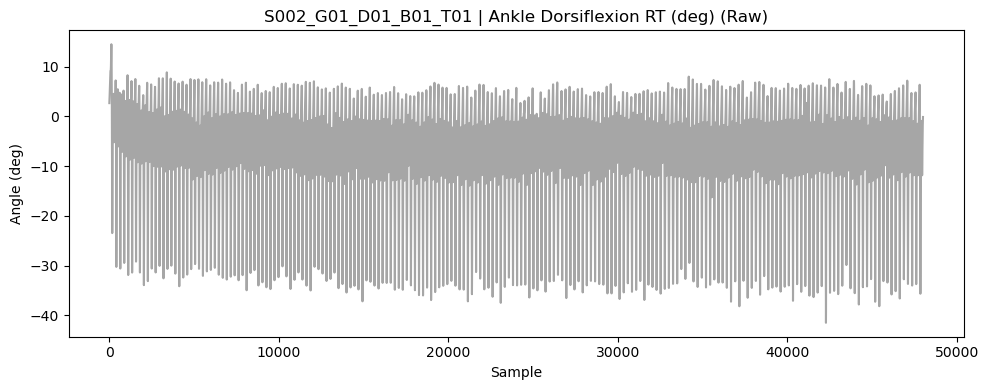

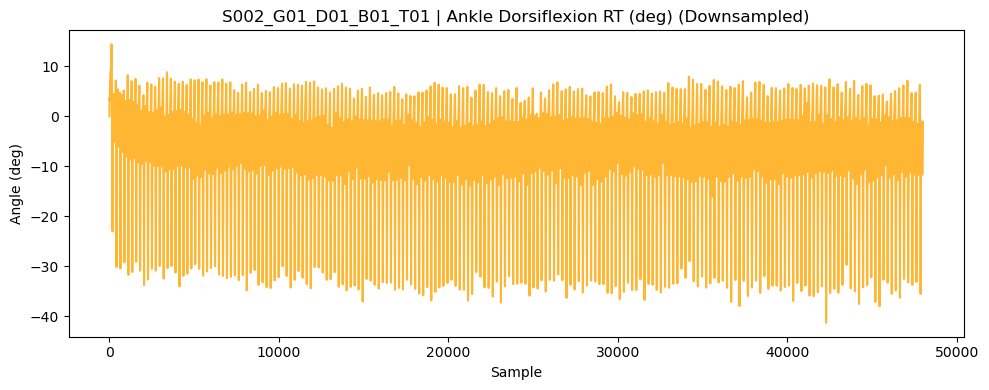

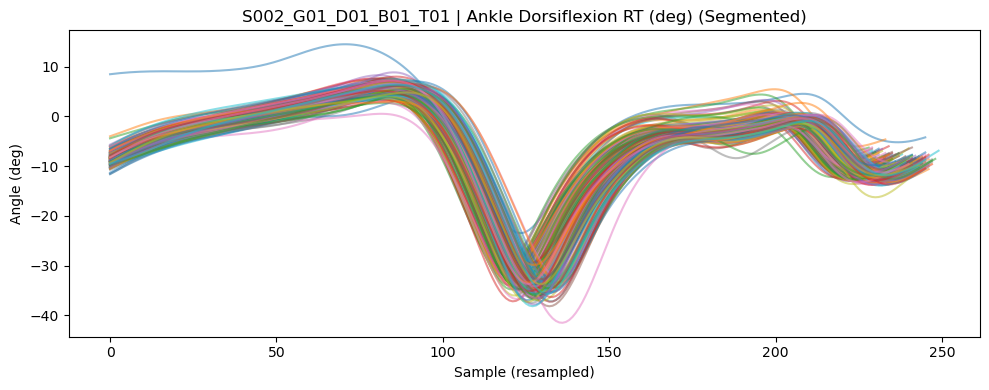

In [4]:
#Just one result
plot_trial(
        patient_id=patient_id,
        group_code=group_code,
        day=day,
        block=block,
        trial=trial,
        show_raw=show_raw,
        show_downsampled=show_downsampled,
        show_segmented=show_segmented,
        save_plots=save_plots
)

[INFO] File Path: /home/dmartinez/Gait-Stability/young adults (19–35 years old)/S002/S002_G01_D01_B01_T01.csv


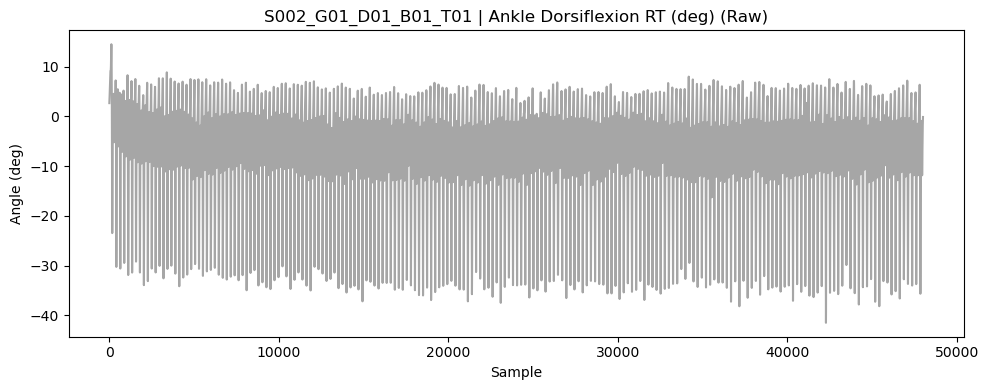

[INFO] File Path: /home/dmartinez/Gait-Stability/old adults (56+ years old)/S139/S139_G03_D01_B01_T01.csv


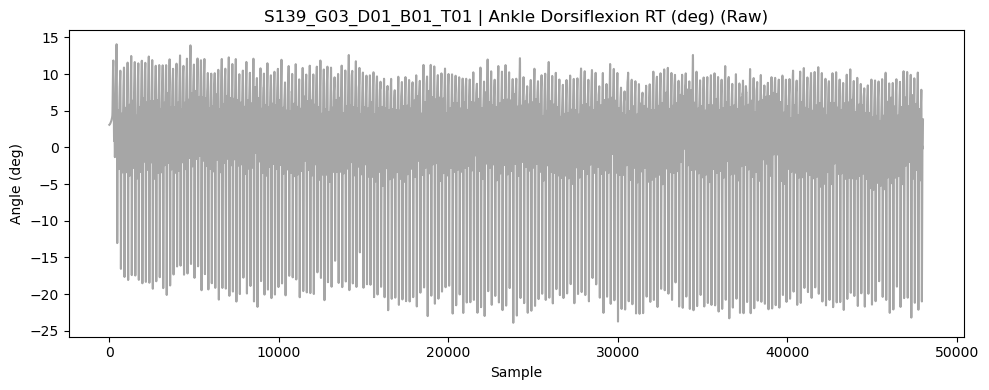

In [8]:
#To compare results 
signal_col        = "Ankle Dorsiflexion RT (deg)"
downsample_factor = 4
show_raw          = True
show_downsampled  = False
show_segmented    = False
save_plots        = False

batches = {
    "G01": {
        "S002": [
            {"trial": "T01", "day": "D01", "block": "B01"},
            
        ]
        
    },
    "G03": {
        "S139": [
            {"trial": "T01", "day": "D01", "block": "B01"},
            
        ]
    },
}


for group_code, patients in batches.items():
    for patient_id, trials in patients.items():
        for trial_info in trials:
            plot_trial(
                patient_id=patient_id,
                group_code=group_code,
                day=trial_info["day"],
                block=trial_info["block"],
                trial=trial_info["trial"],
                signal_col=signal_col,
                downsample_factor=downsample_factor,
                show_raw=show_raw,
                show_downsampled=show_downsampled,
                show_segmented=show_segmented,
                save_plots=save_plots
            )

